Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.
Q2. Split the dataset into a training set (70%) and a test set (30%).
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [12]:
from sklearn.preprocessing import StandardScaler

X[['trestbps','chol','thalach','oldpeak']] = StandardScaler().fit_transform(X[['trestbps','chol','thalach','oldpeak']])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,45,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,68,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,57,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=rfc.predict(X_test)

In [16]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8131868131868132
0.8367346938775511
0.82
0.8282828282828283


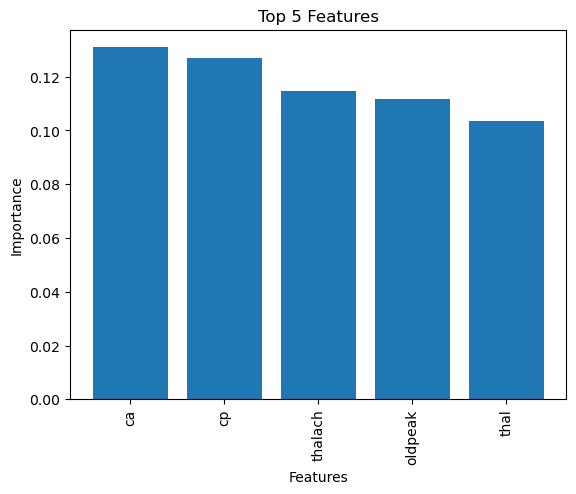

In [22]:
# get feature importances and sort them in descending order
importances = rfc.feature_importances_
indices = importances.argsort()[::-1]

# get the top 5 features and their importances
top_features = X_train.columns[indices][:5]
top_importances = importances[indices][:5]

# plot the feature importances
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Features')
plt.show()

In [23]:
classifier=RandomForestClassifier()

In [24]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.814 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.786 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.690 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.762 total time=   0.2s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [27]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 3, 'criterion': 'entropy'}

In [29]:
rfc_best=RandomForestClassifier(n_estimators=200, max_depth=3, criterion='entropy')
rfc_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200)

In [31]:
y_pred=rfc_best.predict(X_test)

In [32]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8241758241758241
0.8269230769230769
0.86
0.8431372549019608


RF Original vs Best

accuracy_score
 0.8131868131868132 0.8241758241758241

precision_score
0.8367346938775511 0.8269230769230769

recall_score
0.82 0.86

f1_score
0.8282828282828283 0.8431372549019608

To interpret the model by analyzing the decision boundaries of the random forest classifier, we first need to select two of the most important features. We have 'cp' (chest pain type) and 'oldpeak' (ST depression induced by exercise relative to rest) as the two most important features for predicting heart disease risk.

We can plot a scatter plot of 'cp' versus 'oldpeak' and color the points based on their predicted class label using the random forest classifier. This will allow us to visualize the decision boundaries of the classifier on this feature space.


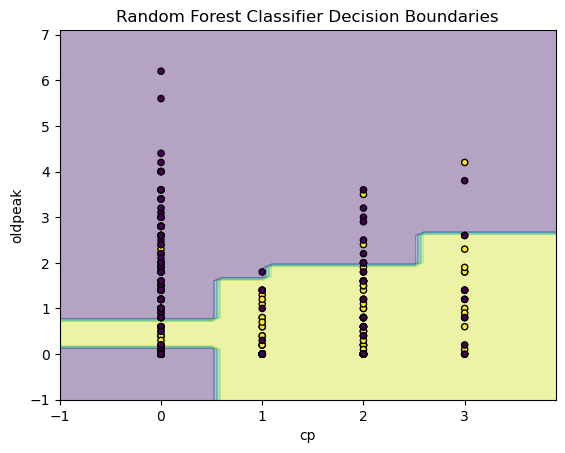

In [34]:
X = np.array(df[['cp','oldpeak']])
y = np.array(df['target'])
# Training a random forest classifier on the selected columns and parameter are taken from RandomizedSearchCV best_params_
classifier = RandomForestClassifier(n_estimators= 200, min_samples_split= 3, min_samples_leaf= 3, max_depth= 6, random_state=0)
classifier.fit(X, y)

# Ploting the decision boundaries on a scatter plot of the two most important features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('cp')
plt.ylabel('oldpeak')
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

Now, we can look at the decision boundaries and see how the classifier separates the data points into different classes. We can observe that the decision boundaries are not linear and are rather complex and nonlinear. The random forest classifier has learned to make a complex set of decisions based on the combination of these two features and other features as well.

The insights provided by the model are that 'cp' and 'oldpeak' are important predictors of heart disease risk, but other factors also play a role. The model also captures the nonlinear relationship between these features and heart disease risk, which is not captured by linear models.
However, the limitations of the model are that it may not generalize well to unseen data. The model may have overfit the training data, meaning that it has learned to fit the noise in the training data as well as the underlying patterns. This can lead to poor performance on new, unseen data. Additionally, the model may not capture all the relevant factors that influence heart disease risk. For example, genetics, lifestyle, and other medical conditions may also play a role, which are not captured by this model. Therefore, it is important to use this model in conjunction with other methods and medical expertise to assess the risk of heart disease accurately